# TRAVAUX PRATIQUES GROUPE 6 K-MEANS: Prédiction du cancer de sein

# 1- Formulation d'une solution 
&emsp;&emsp;Pour aborder ce problème de classification sur le cancer du sein, l'utilisation d'un modèle basé sur l'algorithme K-means pourrait être envisagée pour assigner efficacement les patients aux catégories de témoins sains ou de patientes atteintes de cancer du sein, en se basant sur leurs caractéristiques cliniques.

# 2- Collecte des données
&emsp;&emsp;Nous avons recueilli le dataset sur kaggle: https://www.kaggle.com/datasets/tanshihjen/coimbra-breastcancer/data
    
&emsp;&emsp;Cet ensemble de données présente une exploration complète des caractéristiques cliniques observées ou mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. L'ensemble de données comprend à la fois des attributs quantitatifs et des étiquettes correspondantes pour une analyse et une modélisation efficaces.

**Attributs quantitatifs :**

- **Âge (années):** Âge des individus.
- **IMC (kg/m²):** Indice de masse corporelle, une mesure de la graisse corporelle basée sur le poids et la taille.
- **Glucose (mg/dL):** Glycémie, un indicateur métabolique important.
- **Insuline (µU/mL):** Taux d'insuline, une hormone liée à la régulation du glucose.
- **HOMA:** Homeostatic Model Assessment, une méthode d’évaluation de la résistance à l’insuline et de la fonction des cellules bêta.
- **Leptine (ng/mL):** Taux de leptine, une hormone impliquée dans la régulation de l'appétit et de l'équilibre énergétique.
- **Adiponectine (µg/mL):** Taux d'adiponectine, une protéine associée à la régulation métabolique.
- **Résistine (ng/mL):** Niveaux de résistine, une protéine impliquée dans la résistance à l'insuline.
- **MCP-1 (pg/dL):** Monocyte Chemoattractant Protein-1, une cytokine impliquée dans l'inflammation.

**Étiquettes:**

- **1 :** Témoins sains
- **2 :** Patientes atteintes d’un cancer du sein



# 3-Prétraitement des données 
## Importation des bibliothèques


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#from kneed import KneeLocator 
#import missingno as msno
import numpy as np
import seaborn as sns

from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Chargement du dataset
data=pd.read_csv('Coimbra_breast_cancer_dataset.csv')

In [15]:
# Ouverture du dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [16]:
#Exploration des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [17]:
print(data.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

In [18]:
# Visualisation des valeurs manquantes
#msno.matrix(data)

In [19]:
# Supprimer les duplications
data = data.drop_duplicates()

# Supprimer les colonnes avec des valeurs manquantes
data = data.dropna(axis=1)


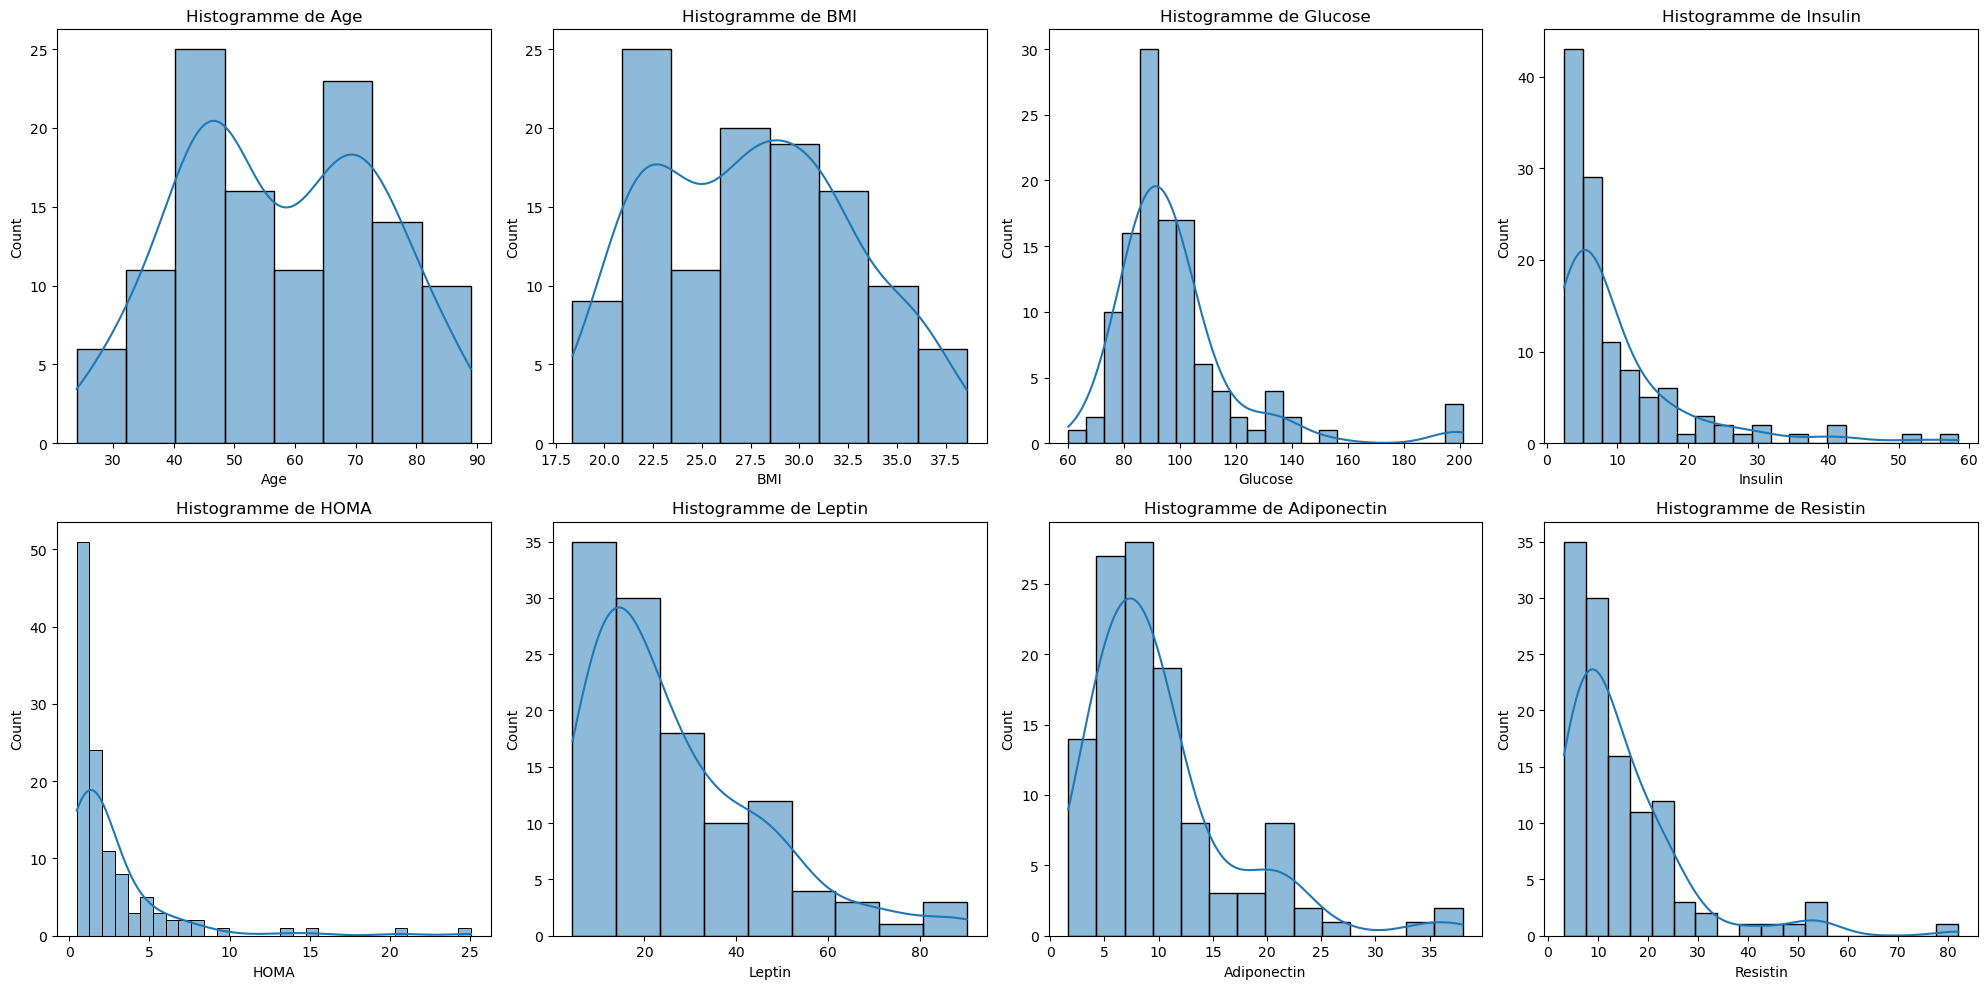

In [20]:
# Examinez la distribution des variables continues avec la courbe de la loi normale
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, variable in enumerate(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin']):
    sns.histplot(data[variable], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogramme de {variable}')
plt.tight_layout()
plt.show()


In [21]:
data.shape

(116, 10)

In [22]:
data_init=data 
# Convert to DataFrame
df = pd.DataFrame(data)

# Separate features and target
X = df.drop(columns=['Classification'])
y = df['Classification']

# Initialize scaler
# Choose either StandardScaler or MinMaxScaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
data=df_normalized # update data normalized without 

In [23]:
# obtenir les centroid initiaux
centroids=data.sample(n=3).values
print(centroids)

[[-0.95378471 -1.24482505 -0.21371203 -0.6996101  -0.55345973 -0.39436184
  -0.25213007  0.2148138  -0.61764406]
 [-0.76678917 -0.88859838  0.8117982  -0.50977099 -0.35638478 -0.45118256
  -0.86386244 -0.76700755 -0.04663223]
 [-0.51746179 -1.32551146 -0.16912462  0.22873605  0.04360679 -0.80492855
  -0.25957675  0.68020192  0.113185  ]]


In [24]:
def euclidianDistance(point1,point2):
     return np.sqrt(np.sum((point1-point2)**2))

In [25]:
def calculateDistanceCentroid(data,centroids):
    distances=[]
    for centroid in centroids:
        distances.append(np.array([euclidianDistance(point,centroid) for point in data.values]))
    return np.array(distances)

In [26]:
def assignNearestCluster(distances):
    return np.argmin(distances,axis=0)

In [27]:
def updateCentroids(data,clusters,numCluster,centroids):
    newCentroids=[]
    for clusterIndex in range(numCluster):
        clusterPoints=data[clusters==clusterIndex]
        if(len(clusterPoints)>0):
            newCentroid=np.mean(clusterPoints,axis=0)
            newCentroids.append(newCentroid)
        else:
            newCentroid.append(centroids[clusterIndex])
    return np.array(newCentroids)

In [28]:
clusters=assignNearestCluster(calculateDistanceCentroid(data,centroids))
print(updateCentroids(data,clusters,len(centroids),centroids))

[[-0.46729225 -0.34307751 -0.47036146 -0.52565195 -0.46287725 -0.24947159
   0.43085112 -0.24313788 -0.49660517]
 [ 0.29474105  0.44161525  0.29161185 -0.13839988 -0.10460821  0.30849118
  -0.42667548 -0.48859593 -0.11695279]
 [ 0.22458399 -0.01207441  0.23003877  0.62187919  0.53404853  0.00114586
  -0.08534774  0.62124569  0.57667272]]


In [29]:
def elbow(X, max_clusters=10):
    """
    Utilise la méthode du coude pour trouver le nombre optimal de clusters.
    Utilise la libraire kneed pour recuperer cette valeur 

    Paramètres:
        X (numpy.ndarray): Jeu de données à clusteriser
        max_clusters (int): Nombre maximal de clusters à considérer (par défaut=10)

    Retourne:
        List: Liste des inerties intra-cluster pour chaque nombre de clusters testé
    """
    return k


In [30]:
class Kmeans:
    """
    Implémentation de l'algorithme de clustering K-Means.

    Paramètres:
        K (int): Nombre de clusters

    Attributs:
        K (int): Nombre de clusters
        centroids (numpy.ndarray): Tableau contenant les centroids de chaque cluster

    Méthodes:
        __init__(self, K): Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        initialize_centroids(self, X): Initialise les centroids pour chaque cluster en sélectionnant K points aléatoires du jeu de données.
        assign_points_centroids(self, X): Assignent chaque point du jeu de données au centroid le plus proche.
        compute_mean(self, X, points): Calcule la moyenne des points assignés à chaque centroid.
        fit(self, X, iterations=10): Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        elbow(self, X, max_clusters=10): Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        plot_clusters(self, X, assigned_points): Affiche le jeu de données avec les clusters assignés.
        evaluation(self, X, assigned_points): Évalue la performance du modèle en utilisant des métriques appropriées.
        inertia(self, X, assigned_points): Calcule l'inertie (somme des carrés des distances intra-cluster).

    """
    
    def __init__(self,data,K,plot):
        """
        ETAPE #1
        Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        Paramètres:
            K (int): Nombre de clusters
        """
        self.K=K
        self.X=data
        self.plot_figure=plot
        
        #pass

    def initialize_centroids(self):
        """
        ETAPE #2
        Initialise les centroids de maniere aleatoire en considerant les instances.


        """
        self.centroids=self.X.sample(n=self.K).values
        #pass

    def assign_points_centroids(self): 
        """
        ETAPE #3
        Assignent chaque point du jeu de données au centroid le plus proche.
        """
       
        distances=[]
        for centroid in self.centroids:
            distances.append(np.array([euclidianDistance(point,centroid) for point in self.X.values]))
        return  np.argmin(np.array(distances),axis=0)

    def compute_mean(self, oldCluster):
        """
        ETAPE #4
        Calcule la moyenne des points assignés à chaque centroid et assigne assigne le nouveau centroid
        
        """
        newCentroids=[]
        for clusterIndex in range(len(self.centroids)):
            clusterPoints=self.X[oldCluster==clusterIndex]
            if(len(clusterPoints)>0):
                newCentroid=np.mean(clusterPoints,axis=0)
                newCentroids.append(newCentroid)
            else:
                newCentroid.append(centroids[clusterIndex])
        self.centroids=np.array(newCentroids)
        pass

    def fit(self, iterations=10):
        """
        ETAPE 5
        Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        """
        self.initialize_centroids()
        #print(self.centroids)
        clusters=self.assign_points_centroids()
        #print(clusters)
        for i in range(iterations):#condition devrait lorsque le precedant cluster est egal au deuxieme
            # if(i==iterations-2):
                # print("precedent cluster")
                # print(clusters)
            self.compute_mean(clusters)
            clusters=self.assign_points_centroids()
        self.X['cluster']=clusters
        # print("final centroid")
        # print(self.centroids)
        # print("final cluster")
        # print(clusters)
        return (self.X,self.centroids)

    def plot_clusters(self, assigned_points):
        """
        Affiche le jeu de données avec les clusters assignés.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point
        """
        pass

    def evaluation(self):
        """
        Évalue la performance du modèle en utilisant des métriques appropriées.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Score d'évaluation
        """
        pass

    def inertia(self):
        """
        Calcule l'inertie (somme des carrés des distances intra-cluster).

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Valeur de l'inertie
        """
        pass


In [31]:
kmeans= Kmeans(data,3,True)

In [32]:
data_classify=kmeans.fit()
data_classify[0]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251,1
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224,1
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214,1
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718,1
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716,1
...,...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527,1
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717,1
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491,2
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832,1


In [33]:
# def euclidianDistance(point1, point2):
#     """
#     Calcul de la distance euclidienne entre deux points.
#     """
#     return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

def calculate_mean_distance(point, group):
    """
    Calcul de la distance moyenne entre un point et tous les points dans un groupe donné.
    """
    return sum(euclidianDistance(point, other_point) for other_point in group) / len(group)

def calculate_a(point, group):
    """
    Calcul de la distance moyenne entre un point et tous les autres points dans le même groupe (a).
    """
    return calculate_mean_distance(point, group)

def calculate_b(point, other_groups):
    """
    Calcul de la distance moyenne entre un point et tous les points dans le groupe le plus proche auquel il n'appartient pas (b).
    """
    min_distance = float('inf')
    for group in other_groups:
        mean_distance = calculate_mean_distance(point, group)
        if mean_distance < min_distance:
            min_distance = mean_distance
    return min_distance

def silhouette_score(data):
    """
    Calcul du score de silhouette moyen pour évaluer la qualité du regroupement.

    Args:
    data : list
        Une liste de points (représentés sous forme de dictionnaires) avec l'attribut 'cluster'.

    Returns:
    float
        Le score de silhouette moyen pour l'ensemble des points.
    """
    groups = {}
    for point in enumerate(data, start=1):
        label = point['cluster']
        if label not in groups:
            groups[label] = []
        groups[label].append(point)

    silhouette_scores = []
    for index, point in enumerate(data, start=1):
        label = point['cluster']
        a = calculate_a(point, groups[label])
        b = calculate_b(point, [groups[key] for key in groups if key != label])
        silhouette_score = (b - a) / max(a, b)
        silhouette_scores.append(silhouette_score)

    return sum(silhouette_scores) / len(data)


In [34]:
# data_classify[0]
# silhouette_score(data_classify[1:])